# Python Time Series Crash Course_Part 5: Evaluation, Performance Measure & Presistence Baseline

## Full Day Workshop for user learn Data Science with Python
### 2017 Dec Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


# Backtest Forecast Model
In time series forecasting, this evaluation of models on historical data is called backtesting.
In some time series domains, such as meteorology, this is called hindcasting, as opposed to
forecasting. We will look at three dierent methods that you can use to backtest your machine
learning models on time series problems. They are:
1. Train-Test split that respect temporal order of observations.
2. Multiple Train-Test splits that respect temporal order of observations.
3. Walk-Forward Validation where a model may be updated each time step new data is
received

In [2]:
# The code was removed by DSX for sharing.

#### we will use the Monthly Sunspots dataset as an example. This dataset describes a monthly count of the number of observed sunspots for just over 230 years (1749-1983).

## Train-Test Split
After loading the dataset as a Pandas Series, we can extract the NumPy array of data
values. The split point can be calculated as a specic index in the array. All records up to the
split point are taken as the training dataset and all records from the split point to the end of
the list of observations are taken as the test set. Below is an example of this in Python using a
split of 66-34.

Observations: 2820
Training Observations: 1861
Testing Observations: 959


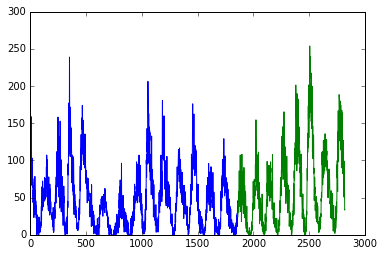

In [5]:
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='sunspots.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


# calculate a train-test split of a time series dataset
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv(body, header=0)
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

Using a train-test split method to evaluate machine learning models is fast. Preparing the
data is simple and intuitive and only one model is created and evaluated. It is useful when
you have a large amount of data so that both training and tests sets are representative of the
original problem

## Multiple Train Test Split

We can repeat the process of splitting the time series into train and test sets multiple times.
This will require multiple models to be trained and evaluated, but this additional computational
expense will provide a more robust estimate of the expected performance of the chosen method
and conguration on unseen data.

the scikit-learn library provides this capability for us in the TimeSeriesSplit
object. You must specify the number of splits to create and the TimeSeriesSplit to return the
indexes of the train and test observations for each requested split.

The total number of training and test observations are calculated each split iteration (i) as follows:

$$training size = i * (n samples / n splits + 1) + n samples mod (n splits + 1)$$

$$test size =
n samples
/n splits + 1$$

Let's look at how we can apply the TimeSeriesSplit on our sunspot data. The dataset has
2,820 observations. Let's create 3 splits for the dataset. Using the same arithmetic above, we
would expect the following train and test splits to be created:
- Split 1: 705 train, 705 test
- Split 2: 1,410 train, 705 test
- Split 3: 2,115 train, 705 test

Observations: 1410
Training Observations: 705
Testing Observations: 705
Observations: 2115
Training Observations: 1410
Testing Observations: 705
Observations: 2820
Training Observations: 2115
Testing Observations: 705


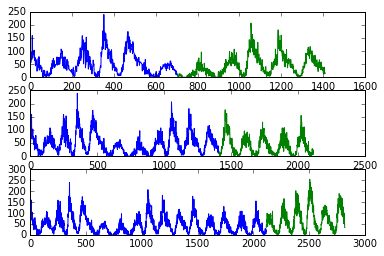

In [6]:
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='sunspots.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


# calculate a train-test split of a time series dataset
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv(body, header=0)
from sklearn.model_selection import TimeSeriesSplit
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    pyplot.subplot(310 + index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    index += 1
pyplot.show()

A limitation of the
train-test split approach is that the trained models remain xed as they are evaluated on each
evaluation in the test set. This may not be realistic as models can be retrained as new daily or
monthly observations are made available

## Walk Forward Validation

Because this methodology involves moving along the time series one-time step at a time, it is
often called Walk Forward Testing or Walk Forward Validation. Additionally, because a sliding
or expanding window is used to train a model, this method is also referred to as 

$$Rolling-Window-Analysis$$ 

or 
$$Rolling-Forecast$$

. This capability is currently not available in scikit-learn, although
you could contrive the same eect with a carefully congured TimeSeriesSplit.

- **1. Minimum Number of Observations. **
First, we must select the minimum number of observations required to train the model. This may be thought of as the window width if a sliding window is used (see next point).
- **2. Sliding or Expanding Window. **
Next, we need to decide whether the model will be trained on all data it has available or only on the most recent observations. This determines whether a sliding or expanding window will be used.

In [8]:
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='sunspots.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
    
# walk forward evaluation model for time series data
from pandas import Series
series = Series.from_csv(body, header=0)
X = series.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

- You can see that many more models are created. This has the benet again of providing a
much more robust estimation of how the chosen modeling method and parameters will perform
in practice. 
- This improved estimate comes at the computational cost of creating so many models.
- This is not expensive if the modeling method is simple or dataset is small (as in this example),
but could be an issue at scale. 
- In the above case, 2,820 models would be created and evaluated.

# Forecasting Performance Measures

Time series generally focus on the prediction of real values, called
regression problems. Therefore the performance measures in this tutorial will focus on methods
for evaluating real-valued predictions.

## Forecast Error (or Residual Forecast Error)
The forecast error is calculated as the expected value minus the predicted value. This is called
the residual error of the prediction.

$$forecast error = expected value - predicted value$$


In [11]:
# calculate forecast error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [-0.2, 0.09999999999999998, -0.1, -0.09999999999999998, -0.2]


The units of the forecast error are the same as the units of the prediction. A forecast error
of zero indicates no error, or perfect skill for that forecast.

## Mean Forecast Error (or Forecast Bias)
Mean forecast error is calculated as the average of the forecast error values.

$$mean forecast error = mean(forecast error)$$


- Forecast errors can be positive and negative. 
- This means that when the average of these
values is calculated, an ideal mean forecast error would be zero. 
- A mean forecast error value
other than zero suggests a tendency of the model to over forecast (positive error) or under
forecast (negative error). 
- As such, the mean forecast error is also called the forecast bias.

In [12]:
# calculate mean forecast error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
bias = sum(forecast_errors) * 1.0/len(expected)
print('Bias: %f' % bias)

Bias: -0.100000


## Mean Absolute Error (MAE)
The mean absolute error, or MAE, is calculated as the average of the forecast error values, where
all of the forecast values are forced to be positive. Forcing values to be positive is called making
them absolute. This is signified by the absolute function abs() or shown mathematically as
two pipe characters around the value: |value|.

$$mean absolute error = mean(abs(forecast error))$$

We can use the mean absolute error() function1
from the scikit-learn library to calculate the mean absolute error for a list of predictions. The
example below demonstrates this function.

In [13]:
# calculate mean absolute error
from sklearn.metrics import mean_absolute_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

MAE: 0.140000


## Mean Squared Error (MSE)
- The mean squared error, or MSE, is calculated as the average of the squared forecast error
values. Squaring the forecast error values forces them to be positive; it also has the eect of
putting more weight on large errors. 
- Very large or outlier forecast errors are squared, which in
turn has the eect of dragging the mean of the squared forecast errors out resulting in a larger
mean squared error score. 
- In effect, the score gives worse performance to those models that
make large wrong forecasts.

$$mean squared error = mean(forecast error2)$$

We can use the mean squared error() function2 from scikit-learn

In [14]:
# calculate mean squared error
from sklearn.metrics import mean_squared_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)

MSE: 0.022000


## Root Mean Squared Error (RMSE)
The mean squared error described above is in the squared units of the predictions. It can be
transformed back into the original units of the predictions by taking the square root of the
mean squared error score. This is called the root mean squared error, or RMSE.


$$rmse = sqrt(mean squared error)$$ 


This can be calculated by using the sqrt() math function on the mean squared error
calculated using the mean squared error() scikit-learn function.

In [15]:
# calculate root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.148324


# Persistence Model for Forecasting
- Establishing a baseline is essential on any time series forecasting problem. 
- A baseline in
performance gives you an idea of how well all other models will actually perform on your
problem.

## Persistence Algorithm
- The most common baseline method for supervised machine learning is the $$Zero-Rule-algorithm$$


- This algorithm predicts the majority class in the case of classification, or the average outcome
in the case of regression. 

- This could be used for time series, but does not respect the serial
correlation structure in time series datasets. 
- The equivalent technique for use with time series
dataset is the $$persistence-algorithm$$


- The persistence algorithm uses the value at the current time step (t) to predict the expected
outcome at the next time step (t+1). This satises the three above conditions for a baseline
forecast.

       t    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3
Test RMSE: 133.156


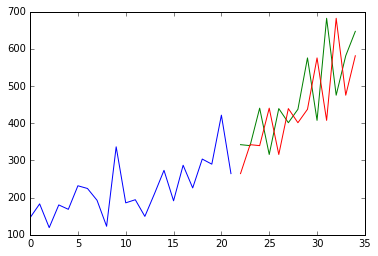

In [16]:
# use shampoo dataset 
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='shampoo-sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


# evaluate a persistence forecast model
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(body, header=0, parse_dates=[0], index_col=0,
    squeeze=True, date_parser=parser)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
    return x
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

#### Line plot of the persistence forecast for the Shampoo Sales dataset showing the training set (blue), test set (green) and predictions (red).

We have seen an example of the persistence model developed from scratch for the Shampoo
Sales problem. The persistence algorithm is naive. It is often called the naive forecast. It
assumes nothing about the specics of the time series problem to which it is applied.

# Residual Error 
Forecast errors on time series regression problems are called residuals or residual errors.
$$residual error = expected - forecast$$
Or, more succinctly and using standard terms as:
$$e = y - yhat$$

- We often stop there and summarize the skill of a model as a summary of this error. Instead,
- we can collect these individual residual errors across all forecasts and use them to better
understand the forecast model. 
- Generally, when exploring residual errors we are looking for
patterns or structure

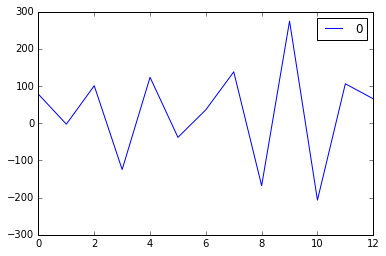

In [22]:
# use shampoo dataset 
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='shampoo-sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


# line plot of residual errors
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = Series.from_csv(body, header=0)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
# plot residuals
residuals.plot()
pyplot.show()



In [21]:
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
# summary statistics
print(residuals.describe())

                0
count   13.000000
mean    29.415385
std    135.169122
min   -206.700000
25%    -38.000000
50%     65.600000
75%    106.000000
max    274.400000


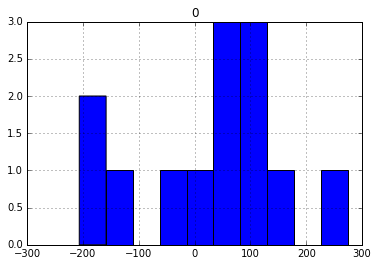

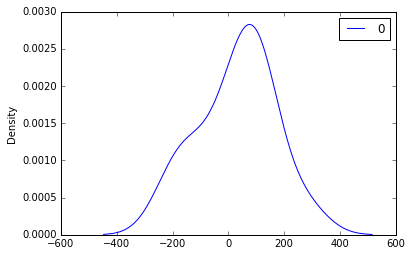

In [20]:
residuals.hist()
pyplot.show()
# density plot
residuals.plot(kind='kde')
pyplot.show()

We can see that the distribution does have a Gaussian look, but is perhaps more pointy,
showing an exponential distribution with some asymmetry. 

#### If the plot showed a distribution that was distinctly non-Gaussian, it would suggest that assumptions made by the modeling process were perhaps incorrect and that a dierent modeling method may be required. 
- A large
skew may suggest the opportunity for performing a transform to the data prior to modeling,
such as taking the log or square root.

Running the example shows a seemingly random plot of the residual time series. If we did
see trend, seasonal or cyclic structure, we could go back to our model and attempt to capture
those elements directly.

## Residual Q-Q Plot
- A Q-Q plot, or quantile plot, compares two distributions and can be used to see how similar or
dierent they happen to be. We can create a Q-Q plot using the qqplot() function1 in the
Statsmodels library.
- The Q-Q plot can be used to quickly check the normality of the distribution of residual errors.
- The values are ordered and compared to an idealized Gaussian distribution. The comparison is
shown as a scatter plot (theoretical on the x-axis and observed on the y-axis) where a match
between the two distributions is shown as a diagonal line from the bottom left to the top-right
of the plot.
- The plot is helpful to spot obvious departures from this expectation. Below is an example
of a Q-Q plot of the residual errors. The x-axis shows the theoretical quantiles and the y-axis
shows the sample quantiles.

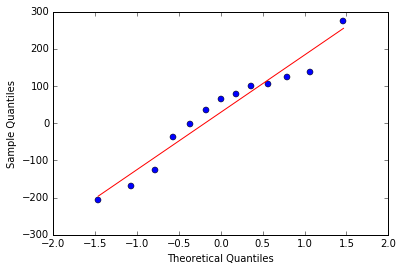

In [25]:
import numpy
from statsmodels.graphics.gofplots import qqplot
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = numpy.array(residuals)
qqplot(residuals, line='r')
pyplot.show()

#### Running the example shows a Q-Q plot that the distribution is seemingly normal with a few bumps and outliers.

## Residual Autocorrelation Plot
- Autocorrelation calculates the strength of the relationship between an observation and observa-
tions at prior time steps. We can calculate the autocorrelation of the residual error time series
and plot the results. This is called an autocorrelation plot. 
- We would not expect there to be
any correlation between the residuals. This would be shown by autocorrelation scores being
below the threshold of signicance (dashed and dotted horizontal lines on the plot).
- A significant autocorrelation in the residual plot suggests that the model could be doing
a better job of incorporating the relationship between observations and lagged observations,
called autoregression. 
- Pandas provides a built-in function for calculating an autocorrelation
plot, called autocorrelation plot().

/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


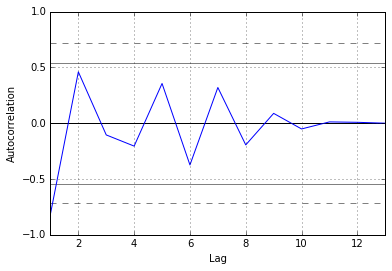

In [28]:

from pandas.tools.plotting import autocorrelation_plot
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
autocorrelation_plot(residuals)
pyplot.show()

- The x-axis
shows the lag and 
- the y-axis shows the correlation between an observation and the lag variable,
where correlation values are between -1 and 1 for negative and positive correlations respectively.
- Running the example creates an autoregression plot of other residual errors. We do not see
an obvious autocorrelation trend across the plot.

# Last Word: Reframing
You do not have to model your time series forecast problem as-is. There are many ways to
reframe your forecast problem that can both simplify the prediction problem and potentially
expose more or dierent information to be modeled. A reframing can ultimately result in better
and/or more robust forecasts.

## Regression Framings
Most time series prediction problems are regression problems, requiring the prediction of a
real-valued output. Below are 5 dierent ways that this prediction problem could be re-phrased
as an alternate regression problem:
- Forecast the change in the minimum temperature compared to the previous day.
- Forecast the minimum temperature relative to the average from the past 14 days.
- Forecast the minimum temperature relative to the average the same month last year.
- Forecast the minimum temperature rounded to the nearest 5 degrees Celsius.
- Forecast the average minimum temperature for the next 7 days.


## Classication Framings
Classication involves predicting categorical or label outputs (like hot and cold). Below are 5
dierent ways that this prediction problem can be rephrased as a classication problem:
-  Forecast whether a minimum temperature will be cold, moderate, or warm.
-  Forecast whether a change in minimum temperature will be small or large.
- Forecast whether the minimum temperature will be a monthly minimum or not.
- Forecast whether the minimum will be higher or lower than the minimum in the previous
year.
- Forecast whether the minimum temperature will rise or fall over the next 7 days.

## Time Horizon Framings
Another axis that can be varied is the time horizon. The time horizon is the number of time
steps in the future that are being predicted. Below are 5 dierent ways that this prediction
problem can be re-phrased as a dierent time horizon:
- Forecast the minimum temperature for the next 7 days.
- Forecast the minimum temperature in 30 days time.
- Forecast the average minimum temperature next month.
- Forecast the day in the next week that will have the lowest minimum temperature.
- Forecast one year of minimum temperature values.